In [37]:
import pandas as pd
import matplotlib.pyplot as plt


In [38]:
base = pd.read_csv('Datasets/vgsales.csv')

In [40]:
base.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [41]:
len(base)

16598

In [42]:
base.drop_duplicates(inplace=True)
len(base)

16598

In [13]:
base.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [43]:
base.isnull().sum()


Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [44]:
base.dropna(inplace=True)

In [45]:
base.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [46]:
base['Year'] = base['Year'].astype(int) 

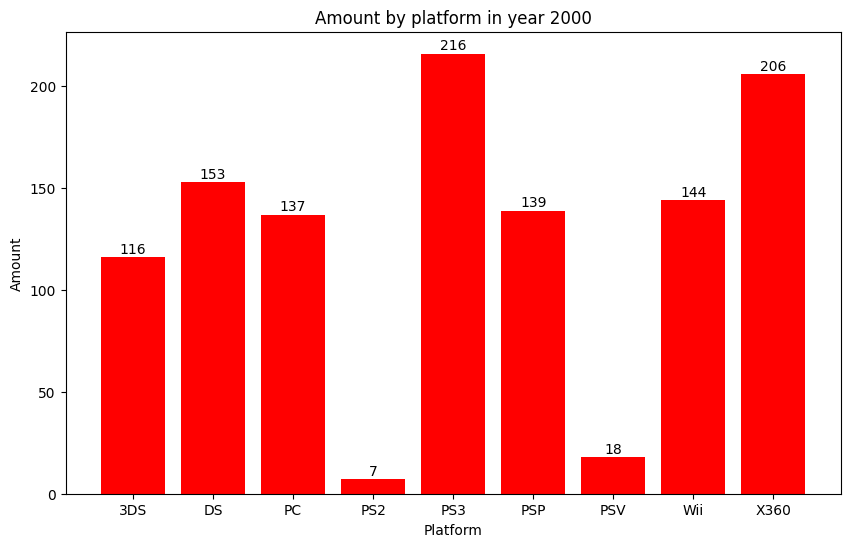

In [69]:
year = 2011
filtered_by_year = base[base['Year']==year]

amount_platform = filtered_by_year.groupby(by='Platform').count()[['Rank']].reset_index()
amount_platform.columns = ['Platform','Amount'] 
amount_platform 

# Crear el gráfico de barras usando Matplotlib
plt.figure(figsize=(10, 6))  # Configura el tamaño del gráfico
plt.bar(amount_platform['Platform'], amount_platform['Amount'], color='red')  # Crea barras
# Añadiendo título y etiquetas
plt.title('Amount by platform in year 2000')
plt.xlabel('Platform')
plt.ylabel('Amount')

# Mostrar valores en las barras
for i, v in enumerate(amount_platform['Amount']):
    plt.text(i, v + 0.5, str(v), ha='center', va='bottom')

# Mostrar el gráfico
plt.savefig(f'images/histogram_age_year_{year}.png')



In [62]:
base.groupby(by='Year').count()[['Rank']]

,Rank
Year,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


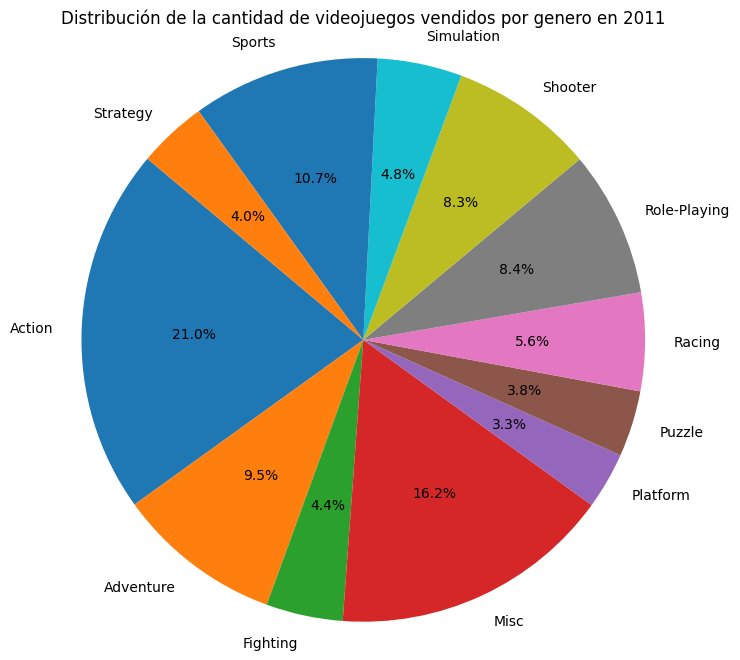

In [72]:
year = 2011
filtered_by_year = base[base['Year']==year]

amount_genre = filtered_by_year.groupby(by='Genre').count()[['Rank']].reset_index()
amount_genre.columns = ['Genre','Amount'] 
amount_genre 

plt.figure(figsize=(8, 8))  # Configura el tamaño del gráfico
plt.pie(amount_genre['Amount'], labels=amount_genre['Genre'], autopct='%1.1f%%', startangle=140)  # Crea el diagrama de pastel
plt.title(f'Distribución de la cantidad de videojuegos vendidos por genero en {year}')
plt.axis('equal')  # Hace que el gráfico sea un círculo en lugar de una elipse

# Mostrar el gráfico
plt.savefig(f'images/pie_chart_{year}.png')
plt.show()
